In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
import torch as tr
from torch import nn
from torch.nn.modules import loss as nn_loss
from torch import optim
from torch.nn import functional as F
from torch.nn import init

In [3]:
from dataloaders.factory import DataLoaderFactory

<module 'base' from 'base/__init__.pyc'>


In [4]:
from base.hyperparams import Hyperparams
from exp_context import ExperimentContext

### **Hyper parameters**

In [5]:
H = Hyperparams

### __Experiment Context__

In [241]:
ExperimentContext.set_context(H)
H = ExperimentContext.Hyperparams
from models.toy.nets import ToyGAN
from models.toy.gantree import GNode
from trainers.gan_trainer import GanTrainer
from trainers.gan_trainer import TrainConfig

loaded HP from class


In [13]:
from utils import model_utils
model_utils.setup_dirs()

### __Model, DataLoader and Trainer Creation__

In [14]:
train_config = TrainConfig(100, 100, 200, 200, 200)
gan = ToyGAN('gan')
dl = DataLoaderFactory.get_dataloader('four_gaussian_sym', H.input_size, H.z_size, H.batch_size, H.batch_size)
trainer = GanTrainer(data_loader=dl, model=gan, hyperparams=H, train_config=train_config)

TypeError: __init__() takes at least 4 arguments (2 given)

### __Training Algorithm__

In [14]:
x = dl.next_batch('train')

In [15]:
gnode = GNode(0, gan)

In [16]:
type(gnode.gan.encode(x.numpy(), numpy=False))

torch.Tensor

In [17]:
# gnode.train_gan(trainer)

In [16]:
gan.classify()

TypeError: classify() takes exactly 2 arguments (1 given)

In [33]:
tr.save(gan.state_dict(), 'gan.pt')

In [15]:
means = tr.Tensor([0.0, 0.0])
cov = tr.Tensor([[1.0, 0.7],
                 [0.7, 1.0]])


In [16]:
X = f.sample(tr.Size([1000])).numpy()

NameError: name 'f' is not defined

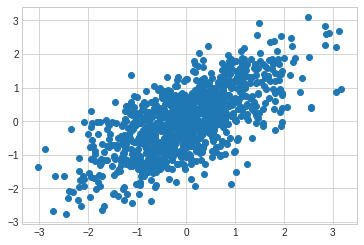

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(plt.style.available[14])
plt.scatter(X[:, 0], X[:, 1])

In [50]:
f.log_prob(tr.Tensor([1,1]))

tensor(-2.0894)

In [51]:
def x_clf_loss(x1, x2, means1, means2, cov1, cov2):
    f1 = tr.distributions.MultivariateNormal(means1, cov1)
    f2 = tr.distributions.MultivariateNormal(means2, cov2)
    
    loss = (f1.log_prob(x1) - f2.log_prob(x1)).mean() + (f2.log_prob(x2) - f1.log_prob(x2)).mean()
    
    loss.backward()
    
    # complete the rest

In [60]:
from models import losses

In [94]:
logits = tr.rand(100, 1)
labels = tr.zeros(100, 1)
print logits.shape, labels.shape
# losses.sigmoid_cross_entropy_loss(logits, labels)

torch.Size([100, 1]) torch.Size([100, 1])


In [22]:
(tr.rand(100) < 0.5).type(tr.FloatTensor).mean()

tensor(0.5400)

In [19]:
tr.Tensor([1,2, 3])

tensor(2.)

In [24]:
def foo(hello):
    return hello ** 2

class Home:
    def foo(self, hello):
        return hello ** 2

In [28]:
h = Home()
type(h.foo)

instancemethod

In [403]:
import inspect

In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib
means = np.array([0, 0])
b = 1.0
cov = np.array([[2, b],
                 [b, 2]])

Using matplotlib backend: TkAgg


In [21]:
from matplotlib.patches import Ellipse

def ellipse(means, cov, s=3, c='red'):
    trace = np.trace(cov)
    det = np.linalg.det(cov)
    a = np.sqrt((trace + np.sqrt(trace ** 2 - 4 * det)) / 2.0)
    b = np.sqrt((trace - np.sqrt(trace ** 2 - 4 * det)) / 2.0)
    theta = np.arctan2(2 * cov[0, 1], cov[0, 0] - cov[1, 1]) / 2.0
    print theta
    deg = theta / np.pi * 180
    return Ellipse(means, 2 * a * s, 2 * b * s, deg, alpha=0.5, color=c)

In [24]:
X = np.random.multivariate_normal(means, cov, 300)
ax = plt.gca()
colors = ['orange', 'red', 'blue']
base_ellipse = ellipse(means, cov, s=1, c=colors[0])
ax.add_artist(base_ellipse)
# for i in range(2):
#     e = ellipse(means, cov, s=3-i, c=colors[i])
#     ax.add_artist(e)
x, y = 8 * np.random.rand(2)
s, t, (nx, ny) = get_s_t(base_ellipse, x, y)
e = ellipse(means, cov, s=s, c='black')
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.scatter(x, y, 5)
ax.scatter(nx, ny, 5)
ax.add_artist(e)
ax.scatter(X[:, 0], X[:, 1], s=0)

0.7853981633974483
0.7853981633974483


In [18]:
def get_s_t(e, x, y):
    a, b = e.width / 2.0, e.height / 2.0
    th = e.angle * np.pi / 180.0
    ct, st = np.cos(th), np.sin(th)
    x, y = y * st + x * ct, y * ct - x * st
    t = np.arctan2(y * a, x * b)
    norm_x = a * np.cos(t)
    norm_y = b * np.sin(t)
    norm_x, norm_y = norm_x * ct - norm_y * st, norm_x * ct + norm_y * st
    return np.sqrt((x/a) ** 2 + (y/b) ** 2), t, (norm_x, norm_y)

In [19]:
s, t, (nx, ny) = get_s_t(e, 0.5, 0.5)    

NameError: name 'e' is not defined

In [572]:
class Encoder(nn.Module):
    def __init__(self, a, b):
        super(Encoder, self).__init__()
        self.l1 = nn.Linear(2, 50)
        self.l2 = nn.Linear(50, 100)
        self.l3 = nn.Linear(100, 3)
        self.a = a
        self.b = b
        
    def forward(self, x):
        x = self.l1(x)
        x = F.elu(x)
        
        x = self.l2(x)
        x = F.elu(x)
        
        x = self.l3(x)
        x = tr.tanh(x)
        
        ax = self.a * x[:, 0:1]
        by = self.b * x[:, 1:2]
        t = np.pi * x[:, 2:3]
        ct = tr.cos(t)
        st = tr.sin(t)
        return tr.cat([ax, by], -1), t, x
    
class TanH(nn.Module):
    def __init__(self):
        super(TanH, self).__init__()
        self.l1 = nn.Linear(2, 50)
        self.l2 = nn.Linear(50, 100)
        self.l3 = nn.Linear(100, 50)
        self.l4 = nn.Linear(50, 2)
    
    def forward(self, x):
        x = self.l1(x)
#         x = F.elu(x)
        
        x = self.l2(x)
#         x = F.elu(x)
        
        x = self.l3(x)
#         x = F.elu(x)
        
        x = self.l4(x)
#         x = F.tanh(x)
        return x

In [559]:
X = tr.Tensor(np.random.uniform(-1, 1, (1000, 2)))

In [560]:
with tr.no_grad():
    encoder = Encoder(10, 2)
    x, t, d = encoder(X)

In [561]:
# plt.hist(t.numpy(), 100);

In [562]:
from matplotlib import pyplot as plt
plt.scatter(x[:, 0], x[:, 1], s=3.0)

In [544]:
X = np.random.uniform(-1, 1, 1000, 2)
angle = np.arctan2(X[:, 1], X[:, 0])

TypeError: uniform() takes at most 3 positional arguments (4 given)

In [573]:
net = TanH()
with tr.no_grad():
    output = net(X).numpy()

In [574]:
plt.scatter(output[:, 0], output[:, 1], s=3.0)

In [70]:
D = [np.abs([tr.det(tr.rand(i+1, i+1)) for _ in range(3000)]).mean() for i in range(30)]

In [71]:
plt.plot(D)

In [197]:
from modules.commons import ZTransform

In [9]:
import numpy as np
means = np.array([2, -4])
b = 9.5
cov = np.array([[10, b],
                 [b, 10]])

means2 = np.array([0.2, 0.2])

cov2 = np.array([[5, -b/2],
                 [-b/2, 5]])

In [230]:
X = np.random.multivariate_normal(means, cov, 5000)
R = np.random.multivariate_normal(means, cov, 5000)

In [235]:
means_ = np.mean(X, axis=0)
cov_ = np.cov(X.T)
transform = ZTransform((means, cov), (means, cov))

In [236]:
X_ = transform(tr.Tensor(X))
R_ = transform.inv(tr.Tensor(R))

In [237]:
print 'Means'
print np.mean(X, axis=0)
print ''
print np.mean(X_.numpy(), axis=0)

print '\nCov:'
print np.cov(X.T)
print ''
print np.cov(X_.numpy().T)

Means
[ 1.91755948 -4.09954146]

[ 1.9175607 -4.0995493]

Cov:
[[10.29336298  9.79708976]
 [ 9.79708976 10.28199218]]

[[10.29336298  9.79708977]
 [ 9.79708977 10.2819922 ]]


In [238]:
D = X
plt.scatter(D[:, 0], D[:, 1], s=3)
D = X_
plt.scatter(D[:, 0], D[:, 1], s=3)
D = R_
plt.scatter(D[:, 0], D[:, 1], s=3)

In [239]:
tr.zeros_like(tr.Tensor(means))

tensor([0., 0.])

In [354]:
from models.toy.nets import ToyGAN
b = 0.85
in_params = (tr.Tensor([0, 0]), tr.Tensor([[1, b], [b, 1]]))
out_params = (tr.Tensor([0, 0]), tr.Tensor([[1, -b], [-b, 1]]))
gan = ToyGAN('gan', out_params, in_params)

In [355]:
X = gan.sample((50000,)).numpy()
X_ = gan.sample((50000,), 'out').numpy()

In [356]:
print X.shape

(50000, 2)


In [357]:
plt.scatter(X[:, 0], X[:, 1], s=0.005)
plt.scatter(X_[:, 0], X_[:, 1], s=0.005)

In [ ]:
tr.set_default_tensor_type('torch.cuda.FloatTensor')

In [6]:
import torch as tr

In [12]:
1 / (tr.Tensor(cov))

tensor([[0.1000, 0.1053],
        [0.1053, 0.1000]])

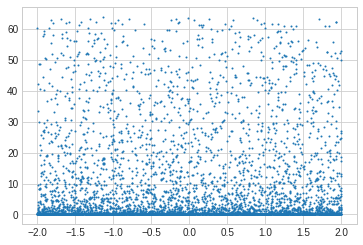

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(plt.style.available[14])
X = np.random.uniform(-2, 2, (5000, 2))
plt.scatter(X[:, 0], X[:, 1] ** 6, s=1)

In [59]:
def fun(n, m):
    s = 1
    for i in range(n):
        for j in range(m):
            s *= (i+1)
            s %= int(1e9+7)
    return s, -s

In [60]:
fun(100, 43)

(921021445, -921021445)

In [61]:
from multiprocessing import Pool

In [64]:
pool = Pool(2)

Process PoolWorker-6:
Process PoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
    task = get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 374, in get
    racquire()
KeyboardInterrupt
    return recv()
KeyboardInterrupt


In [68]:
def cback(x, y):
    print x
    print y

res = pool.apply_async(fun, (100, 43), callback=cback)

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 408, in _handle_results
    cache[job]._set(i, obj)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 577, in _set
    self._callback(self._value)
TypeError: cback() takes exactly 2 arguments (1 given)



In [67]:
res.get()

(921021445, -921021445)

In [70]:
from torch.functional import F

In [76]:
import requests

In [77]:
requests.get('http://10.32.24.52', )

KeyboardInterrupt: 

In [79]:
resp = requests.get('http://www.gregreda.com/2015/02/15/web-scraping-finding-the-api/')

In [86]:
print('http://google.com')

http://google.com
